In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [81]:
class layer:
    def __init__(self, inputs, in_size, out_size, activation_function=None):
#         self.W = tf.Variable(tf.zeros([in_size, out_size]))
        self.W = tf.Variable(tf.random_normal([in_size, out_size]))
        self.b = tf.Variable(tf.constant(0.1, shape=[1,out_size]))
#         self.b = tf.Variable(tf.random_normal([1,out_size]))
        self.Wx_plus_b = tf.matmul(inputs, self.W) + self.b
#         self.activation_function = activation_function
    def output(self, activation_function=None):
        if activation_function == None:
            result = self.Wx_plus_b
        else :
            result = activation_function(self.Wx_plus_b)
        return result

In [85]:
xs = tf.placeholder(tf.float32, [None, 784])    #shape=(100,784)
ys = tf.placeholder(tf.float32, [None, 10])    #shape=(100,10)


layer1 = layer(xs, 784, 512)
layer2 = layer(layer1.output(tf.nn.relu), 512, 256)
layer3 = layer(layer2.output(tf.nn.relu), 256, 128)
layer4 = layer(layer3.output(tf.nn.relu), 128, 64)
layer5 = layer(layer4.output(tf.nn.relu), 64, 32)
layer6 = layer(layer5.output(tf.nn.relu), 32, 16)
layer7 = layer(layer6.output(tf.nn.relu), 16, 8)
layer8 = layer(layer7.output(tf.nn.relu), 8, 4)
layer9 = layer(layer8.output(tf.nn.relu), 4, 2)
layer10 = layer(layer9.output(tf.nn.relu), 2, 4)
layer11 = layer(layer10.output(tf.nn.relu), 4, 8)
layer12 = layer(layer11.output(tf.nn.relu), 8, 16)
layer13 = layer(layer12.output(tf.nn.relu), 16, 32)
layer14 = layer(layer13.output(tf.nn.relu), 32, 64)
layer15 = layer(layer14.output(tf.nn.relu), 64, 128)
layer16 = layer(layer15.output(tf.nn.relu), 128, 256)
layer17 = layer(layer16.output(tf.nn.relu), 256, 512)
layer18 = layer(layer17.output(tf.nn.sigmoid), 512, 784)




# layer1 = layer(xs, 784, 100)
# layer2 = layer(layer1.output(tf.nn.relu), 100, 10)
# layer3 = layer(layer2.output(tf.nn.relu), 10, 2)
# layer4 = layer(layer3.output(tf.nn.relu), 2, 10)
# layer5 = layer(layer4.output(tf.nn.relu), 10, 100)
# layer6 = layer(layer5.output(tf.nn.relu), 100, 784)


# layer_pre1 = layer(layer1.output(tf.nn.relu), 100, 784)
# layer_pre2 = layer(layer2.output(tf.nn.relu), 10, 100)


loss_ae = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer18.output(tf.nn.sigmoid)))
# loss_ae = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer6.output(tf.nn.relu)))
# loss_ae_pre1 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer10.output(tf.nn.relu)))
# loss_ae_pre1 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer10.output(tf.nn.relu)))

# loss_ae = tf.reduce_mean(tf.square(xs-layer10.output(tf.nn.relu)))
# train_step_ae = tf.train.GradientDescentOptimizer(0.5).minimize(loss_ae)
# train_step_ae = tf.train.RMSPropOptimizer(0.05).minimize(loss_ae)
train_step_ae = tf.train.MomentumOptimizer(0.2,0.1).minimize(loss_ae)
# train_step_ae = tf.train.AdamOptimizer(0.002).minimize(loss_ae)


# correct_prediction = tf.equal(tf.argmax(layer3,1), tf.argmax(ys,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [86]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

batch_size = 200
batches = x_train.shape[0]//batch_size
index = np.arange(x_train.shape[0])

epoch:  0  , loss:  0.917678
epoch:  5  , loss:  0.885612
epoch:  10  , loss:  0.871607
epoch:  15  , loss:  0.858039
epoch:  20  , loss:  0.847209
epoch:  25  , loss:  0.840878
epoch:  30  , loss:  0.836518
[[  3.86821775e-09   1.72045205e-08   1.84466700e-08 ...,   1.01832006e-11
    3.98861122e-09   4.26208180e-09]
 [  1.24449540e-09   1.02454316e-10   5.58069813e-09 ...,   1.99121537e-08
    6.78398893e-09   2.89033375e-09]
 [  3.05060505e-10   3.18813598e-09   1.00908544e-08 ...,   7.76045406e-13
    5.89113980e-10   3.80464354e-10]
 [  1.65299383e-08   5.20288390e-09   7.27524307e-09 ...,   2.20582077e-11
    4.23139124e-09   5.24967447e-09]]


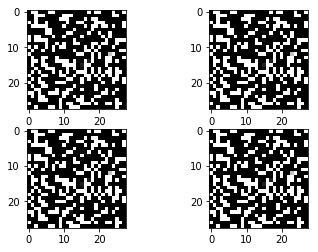

In [87]:
#Autoencoder
for epoch in range(31):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})

    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer10_outputs[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

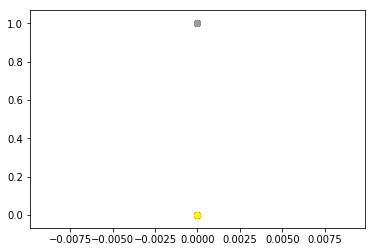

In [88]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.656306
epoch:  5  , loss:  0.656306
epoch:  10  , loss:  0.656306
epoch:  15  , loss:  0.656306
epoch:  20  , loss:  0.656306
epoch:  25  , loss:  0.656306
epoch:  30  , loss:  0.656306
epoch:  35  , loss:  0.656306
epoch:  40  , loss:  0.656306
epoch:  45  , loss:  0.656306
epoch:  50  , loss:  0.655454
epoch:  55  , loss:  0.645095
epoch:  60  , loss:  0.645095
epoch:  65  , loss:  0.645095
epoch:  70  , loss:  0.645095
epoch:  75  , loss:  0.645095
epoch:  80  , loss:  0.645095
epoch:  85  , loss:  0.645095
epoch:  90  , loss:  0.645095
epoch:  95  , loss:  0.645095
epoch:  100  , loss:  0.645095
[[  3.86821775e-09   1.72045205e-08   1.84466700e-08 ...,   1.01832006e-11
    3.98861122e-09   4.26208180e-09]
 [  1.24449540e-09   1.02454316e-10   5.58069813e-09 ...,   1.99121537e-08
    6.78398893e-09   2.89033375e-09]
 [  3.05060505e-10   3.18813598e-09   1.00908544e-08 ...,   7.76045406e-13
    5.89113980e-10   3.80464354e-10]
 [  1.65299383e-08   5.20288390e-09

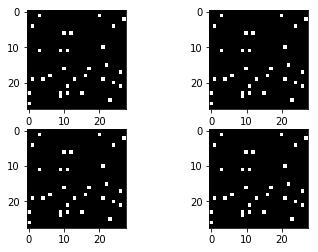

In [78]:
#Autoencoder
for epoch in range(101):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer4_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer4_outputs])
print layer10_outputs[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

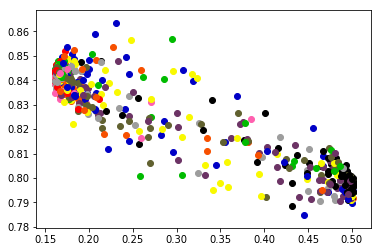

In [79]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

In [80]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer10_outputs])
print layer10_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

epoch:  0  , loss:  0.645095
epoch:  5  , loss:  0.645095
epoch:  10  , loss:  0.645095
epoch:  15  , loss:  0.645095
epoch:  20  , loss:  0.645095
epoch:  25  , loss:  0.645095
epoch:  30  , loss:  0.645095
epoch:  35  , loss:  0.645095
epoch:  40  , loss:  0.645095
epoch:  45  , loss:  0.645095
epoch:  50  , loss:  0.645095
epoch:  55  , loss:  0.645095
epoch:  60  , loss:  0.645095
epoch:  65  , loss:  0.645095
epoch:  70  , loss:  0.645095
epoch:  75  , loss:  0.645095
epoch:  80  , loss:  0.645095
epoch:  85  , loss:  0.645095
epoch:  90  , loss:  0.645095
epoch:  95  , loss:  0.645095
epoch:  100  , loss:  0.645095
epoch:  105  , loss:  0.645095
epoch:  110  , loss:  0.645095
epoch:  115  , loss:  0.645095
epoch:  120  , loss:  0.645095
epoch:  125  , loss:  0.645095
epoch:  130  , loss:  0.645095
epoch:  135  , loss:  0.645095
epoch:  140  , loss:  0.645095
epoch:  145  , loss:  0.645095
epoch:  150  , loss:  0.645095
epoch:  155  , loss:  0.645095
epoch:  160  , loss:  0.645095

KeyboardInterrupt: 

In [ ]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

In [ ]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer10_outputs])
print layer10_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

In [ ]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

In [ ]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer10_outputs])
print layer10_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

In [ ]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

In [ ]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer10_outputs])
print layer10_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

In [ ]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)